######The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Raoult's Law

This [IPython notebook](http://ipython.org/notebook.html) illustrates the use of Raoult's Law to calculate vapor pressure, and compares the results to experimental data for a non-ideal system. The video is used with permission from [learnCheme.com](http://learncheme.ning.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

Initialize the IPython workspace with with default settings for plots.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.figsize':(10,6)})
plt.rcParams.update({'font.size':12})
plt.rcParams.update({'lines.linewidth':1.6})

## Introduction

Raoult's law says the partial pressure of each component of an ideal mixture of liquids is equal to the product of the mole fraction and the saturation pressure of the pure component. That is,

$$y_n P = x_n P^{sat}_n(T) $$

For an ideal gas, the total vapor pressure of the liquid is equal to the sum of partial pressures,

$$P = \sum_{n=1}^N x_n P^{sat}_n(T) $$

The is explained in further detail in the following video

In [24]:
from IPython.display import YouTubeVideo
YouTubeVideo('Adr9_2LnQdw') 

## Vapor Pressure of Pure Components

The calculations in this notebook are for a representative system of two components, acetone and ethanol. We start by creating two functions to estimate vapor pressure for the individual species using Antoine's equation.

In [25]:
# Antoine's equations
A = 'acetone'
B = 'ethanol'

def PsatA(T):
    return 10**(7.02447 - 1161.0/(T + 224))

def PsatB(T):
    return 10**(8.04494 - 1554.3/(T + 222.65))

Create plots for the vapor pressure of each component as a function of temperature.

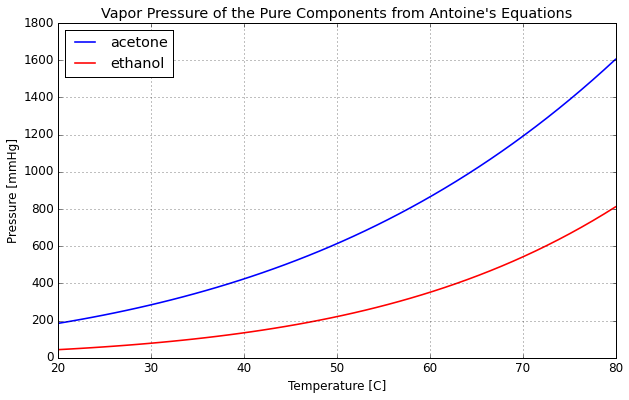

In [35]:

# Plot pure component vapor pressures
T = np.linspace(20,80)

plt.plot(T,PsatA(T),'b')
plt.plot(T,PsatB(T),'r')

plt.ylabel('Pressure [mmHg]')
plt.xlabel('Temperature [C]')
plt.legend([A,B],loc='best')
plt.title("Vapor Pressure of the Pure Components from Antoine's Equations")
plt.grid();

## Vapor Pressure of an Acetone/Ethanol Mixture at a Fixed Temperature

In this example we estimate the vapor pressure of an acetone/ethanol mixture using Raoult's law, assuming the vapor pressure of the component species are given by Antoine's equation. The estimate is compared to experimentally measured data.

For a binary mixture of acetone ($A$) and ethanol ($B$)

$$P(T,x_A) = x_{A} P^{sat}_{A}(T) + (1-x_{A})P^{sat}_{B}(T)$$

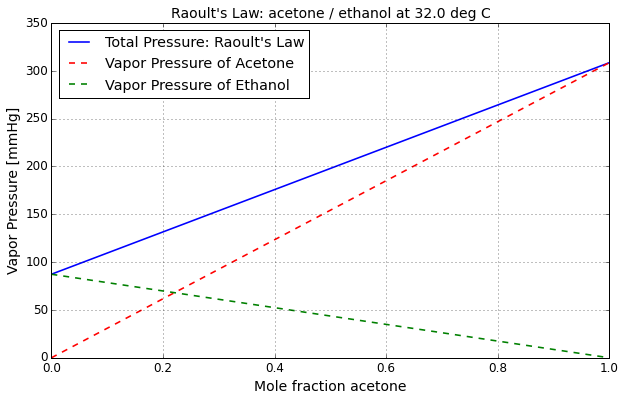

In [37]:
# Plot vapor pressure using Raoult's law at 32 deg C
T = 32
x = np.linspace(0,1)

plt.plot(x,map(lambda x: x*PsatA(T) + (1-x)*PsatB(T),x),'b')
plt.plot(x,map(lambda x: x*PsatA(T),x),'r--')
plt.plot(x,map(lambda x: (1-x)*PsatB(T),x),'g--')

plt.xlim(0,1)
plt.ylim(0,350)
plt.xlabel('Mole fraction ' + A, fontsize = 14)
plt.ylabel('Vapor Pressure [mmHg]', fontsize = 14)
plt.title('Raoult\'s Law: ' + A + ' / ' + B + ' at {:.1f} deg C'.format(T), fontsize = 14)
plt.legend(['Total Pressure: Raoult\'s Law','Vapor Pressure of Acetone','Vapor Pressure of Ethanol'],loc='best')
plt.grid()

## Comparing Raoult's Law to Experimental Data

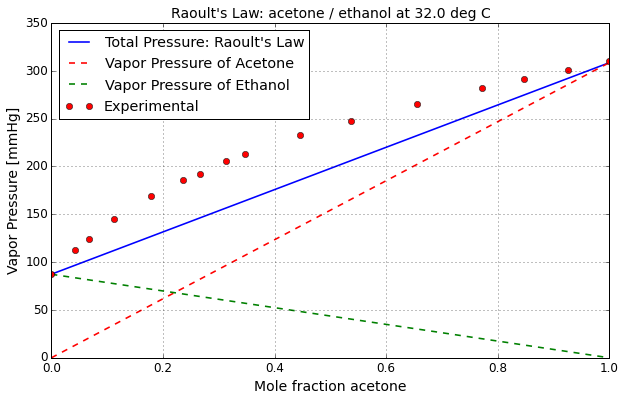

In [38]:
plt.plot(x,map(lambda x: x*PsatA(T) + (1-x)*PsatB(T),x),'b')
plt.plot(x,map(lambda x: x*PsatA(T),x),'r--')
plt.plot(x,map(lambda x: (1-x)*PsatB(T),x),'g--')

# Experimental data of (P,x) observations
Px = np.array([\
    [11.679, 0.00000],\
    [14.999, 0.04220],\
    [16.585, 0.06730],\
    [19.358, 0.11300],\
    [22.571, 0.17870],\
    [24.811, 0.23610],\
    [25.585, 0.26650],\
    [27.384, 0.31280],\
    [28.371, 0.34700],\
    [31.037, 0.44580],\
    [33.037, 0.53720],\
    [35.370, 0.65480],\
    [37.584, 0.77210],\
    [38.890, 0.84740],\
    [40.130, 0.92520],\
    [41.317, 1.00000]])

# Convert kPa to mmHg
P = Px.T[0]*760/101.3

# Convert K to C
T = 305.15 - 273.15

# Extract measured composition
x = Px.T[1]

# Overlay plot of experimental data and label$$ 
plt.plot(x,P,'ro')
plt.xlim(0,1)
plt.ylim(0,350)
plt.xlabel('Mole fraction ' + A, fontsize = 14)
plt.ylabel('Vapor Pressure [mmHg]', fontsize = 14)
plt.title('Raoult\'s Law: ' + A + ' / ' + B + ' at {:.1f} deg C'.format(T), fontsize = 14)
plt.legend(['Total Pressure: Raoult\'s Law','Vapor Pressure of Acetone','Vapor Pressure of Ethanol','Experimental'],'best')
plt.grid()

## A Short Database of Antoine Equations for Selected Compounts

In [39]:
# Psat by Antoine's equation for selected compounds
Psat = dict()
Psat_Tmin = dict()
Psat_Tmax = dict()

Psat['benzene'] = lambda T: 10**(6.90565 - 1211.033/(T + 220.790))
Psat_Tmin['benzene'] = 8
Psat_Tmax['benzene'] = 103
    
Psat['ethanol'] = lambda T: 10**(8.04494 - 1554.3/(T + 222.65))
Psat_Tmin['ethanol'] = -2
Psat_Tmax['ethanol'] = 100
    
Psat['methanol'] = lambda T: \
    (T <= 65) and 10**(7.89750 - 1474.08/(T + 229.13)) or \
    (T > 65) and 10**(7.97328 - 1515.14/(T + 232.85))
Psat_Tmin['methanol'] = -14
Psat_Tmax['methanol'] = 110
    
Psat['toluene'] = lambda T: 10**(6.95464 - 1344.8/(T + 219.48))
Psat_Tmin['toluene'] = 6
Psat_Tmax['toluene'] = 137

Psat['water'] = lambda T: \
    (T <= 60) and 10**(8.10765 - 1750.286/(T + 235.0)) or \
    (T > 60) and 10**(7.96681 - 1668.21/(T + 228.0))
Psat_Tmin['water'] = 0
Psat_Tmax['water'] = 150


# Tsat functions
Tsat = dict()
Tsat_Pmin = dict()
Tsat_Pmax = dict()

from scipy.optimize import brentq as fzero

for s in Psat.keys():
    Tsat_Pmin[s] = Psat[s](Psat_Tmin[s])
    Tsat_Pmax[s] = Psat[s](Psat_Tmax[s])
    Tsat[s] = lambda P,s = s: fzero(lambda T: Psat[s](T)-P,Psat_Tmin[s],Psat_Tmax[s])